# Uncorrelatedness does not imply independence

### Purpose
1. **Sec. 0~4**: In this sections, we'd like to show a counterexample, why simply **_uncorrelate the observe mixed signals_** (i.e, perform Mahalanobis transformantion to observed $\mathbf{X}$) cannot derive blind source signals, which are actually **"independent"**

1. **Sec. 5**: after showing the *wrong* transformation that doesn't work, we than perform **ICA** methoud, which could actually separate the "independent" signals, as required. (We also compare with PCA and FA results, which don't work in this case either)

In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0. Generate Data: Independent Signals $\mathbf{Y}$ (3-D)

For sample size ($N$) = 20000 (from time $t=0$ to $t=1$), we try to generate 3 independent signals ($Y_1 \sim Y_3$), where
> $Y_1$: sawtooth or triangle waveform  
> $Y_2$: sin waveform  
> $Y_3$: square-wave waveform  

**Note**: 
1. Since the designated numbers of frequency for each wave (i.e., fs) might influence the dependence of these signals, they can only be as independent as possible
1. Besides, the values of frequency (i.e. fs) for each signals shoud be larger, that is, to generate more periods (or cycles) in an interval, in order for ICA to better seperate out independent signals. (You can compare ICA results when fs values are smaller than default here)

In [28]:
# ======================================= 0. Generate Data: Independent Signals Y (3-D) =========================================================
from scipy import signal

N = 20000

# Generate Sawtooth wase - Y1 with fs Hz waveform sampled at N Hz for 1 second:
t = np.linspace(0, 1, N)

fs = 7# try smaller, e.g., 4
Y1= signal.sawtooth(2 * np.pi * fs * t) 
#plt.plot(t, Y1)

# Generate sine wase - Y2
fs = 13 ## try smaller, e.g., 13
Y2 = np.sin(fs*t)
#plt.plot(t, Y2)

# Generate 
fs = 16## try smaller, e.g., 7
Y3 = signal.square(2 * np.pi * fs * t)
#plt.plot(t, Y3)


Y = pd.concat([pd.Series(Y1), pd.Series(Y2), pd.Series(Y3)], axis=1)
Y.columns =  ['Y1', 'Y2', 'Y3']

print('A glance of Y: \n')
Y.head(10)


A glance of Y: 



,Y1,Y2,Y3
0,-1.0000,0.00000,1.0
1,-0.9993,0.00065,1.0
2,-0.9986,0.00130,1.0
3,-0.9979,0.00195,1.0
4,-0.9972,0.00260,1.0
5,-0.9965,0.00325,1.0
6,-0.9958,0.00390,1.0
7,-0.9951,0.00455,1.0
8,-0.9944,0.00520,1.0
9,-0.9937,0.00585,1.0


- ## Check correlations among $Y_1 \sim Y_3$

Since $Y_1 \sim Y_3$ are (almost) independent, their estimated correlations should be close to 0.
Let's check out the correlation matrix (i.e., $Corr$)
> The following shows that the estimated correlations between different $Y$'s are close to 0 (e.g., $corr(Y_1, Y_2)=0.054$).

In [29]:
# Check correlation among Y1~Y3
print('Corr matrix of Y is: \n')
np.round(Y.corr(), 3)

Corr matrix of Y is: 



,Y1,Y2,Y3
Y1,1.000,0.026,-0.008
Y2,0.026,1.000,-0.010
Y3,-0.008,-0.010,1.000


- ## Visualization of Signals $\mathbf{Y}$

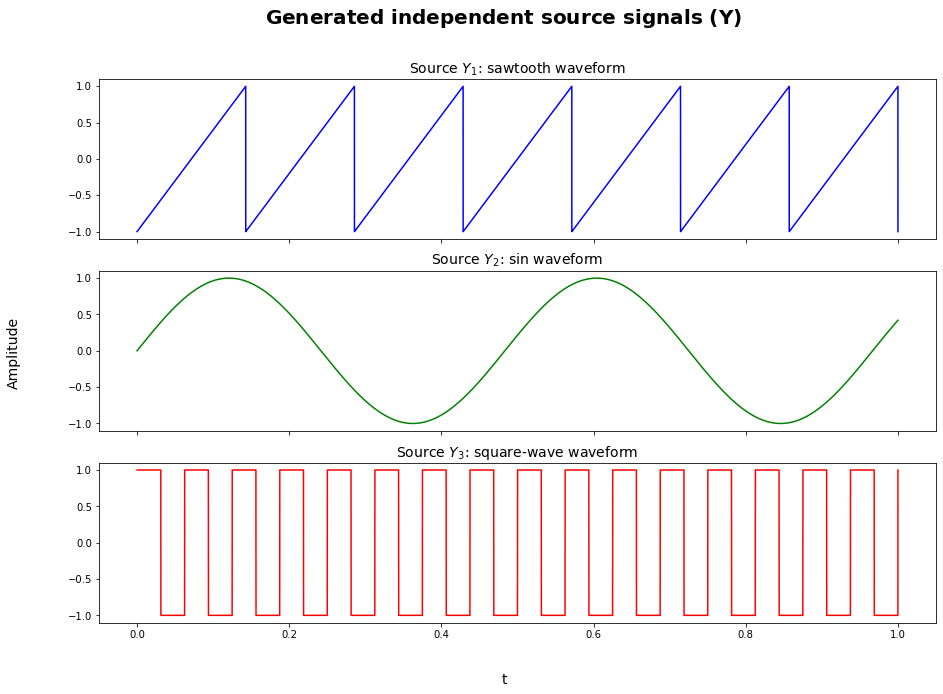

In [30]:
# Visualization of source and mixing data  -------------------------------------------------------------
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10)) #
# Y1
ax[0].set_title('Source $Y_1$: sawtooth waveform ', fontsize=14)
ax[0].plot(t, Y.Y1, label="Source Y1", color = 'b')  #

# Y2
ax[1].set_title('Source $Y_2$: sin waveform ', fontsize=14)
ax[1].plot(t, Y.Y2, label="Source Y2", color = 'g') #

# Y3
ax[2].set_title('Source $Y_3$: square-wave waveform ', fontsize=14)
ax[2].plot(t, Y.Y3, label="Source Y3", color = 'r') #

fig.text(0.5, 0.04, 't', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=14)
plt.suptitle("Generated independent source signals ($\mathbf{Y}$)", fontsize=20, fontweight ='bold')
plt.show()

# 1.  Derive Data: Mixed Signals $\mathbf{X}$ (3-D) from Source Signals $\mathbf{Y}$

First, we can desgin mixing matrix $\mathbf{A} = \mathbf{W}^{-1}$ of our own, and hence derive the mixing signals $\mathbf{X}$ by $\mathbf{X} = \mathbf{A}\mathbf{Y}$ (i.e., $\mathbf{Y}=\mathbf{W}\mathbf{X}$).

The result is as follows:

- ## mixing matrix $\mathbf{A}$

In [31]:
# ======================================= 1. Derive Data: Mixed Signals X (3-D) =========================================================
# Design mixing matrix A
'''
A = np.array([[ 1.31,  0.14,  0.18],
              [-0.42, -1.26, -1.25],
              [-0.03,  0.41, -0.49]]) * (0.01)
'''
A = np.array([[ 0.33,  0.33,  0.34],
              [ 1.50,  1.50,  0.05],
              [ 1.05,  0.45,  0.45]]) 
print('Mixing matrix A is:\n')
pd.DataFrame(A)

Mixing matrix A is:



,0,1,2
0,0.33,0.33,0.34
1,1.50,1.50,0.05
2,1.05,0.45,0.45


- ## nonsingular linear transformation matrix $\mathbf{W}$ ($=\mathbf{A}^{-1}$)

That is, a matrix to extract source signals $\mathbf{Y}$ back from performing transformation from $\mathbf{X} $(i.e., $\mathbf{Y}=\mathbf{W}\mathbf{X}$).

In [32]:
# Derive W= inverse of A
W = np.linalg.inv(A)

print('And hence that nonsingular linear transformation matrix W is:\n')
pd.DataFrame(W)

And hence that nonsingular linear transformation matrix W is:



,0,1,2
0,-2.203647,-0.015198,1.666667
1,2.102330,0.704154,-1.666667
2,3.039514,-0.668693,0.000000


- ## Visualization of Mixed Signals $\mathbf{X}$

In [33]:
X = np.dot(A, Y.T).T
X = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
#print('Corr matrix of X is {}'.format(X.corr()))

print('A glance of X: \n')
X.head(10)

A glance of X: 



,X1,X2,X3
0,0.010000,-1.450000,-0.600000
1,0.010446,-1.447975,-0.598972
2,0.010891,-1.445950,-0.597945
3,0.011337,-1.443925,-0.596917
4,0.011782,-1.441900,-0.595890
5,0.012228,-1.439875,-0.594862
6,0.012673,-1.437849,-0.593835
7,0.013119,-1.435824,-0.592807
8,0.013564,-1.433799,-0.591780
9,0.014010,-1.431774,-0.590752


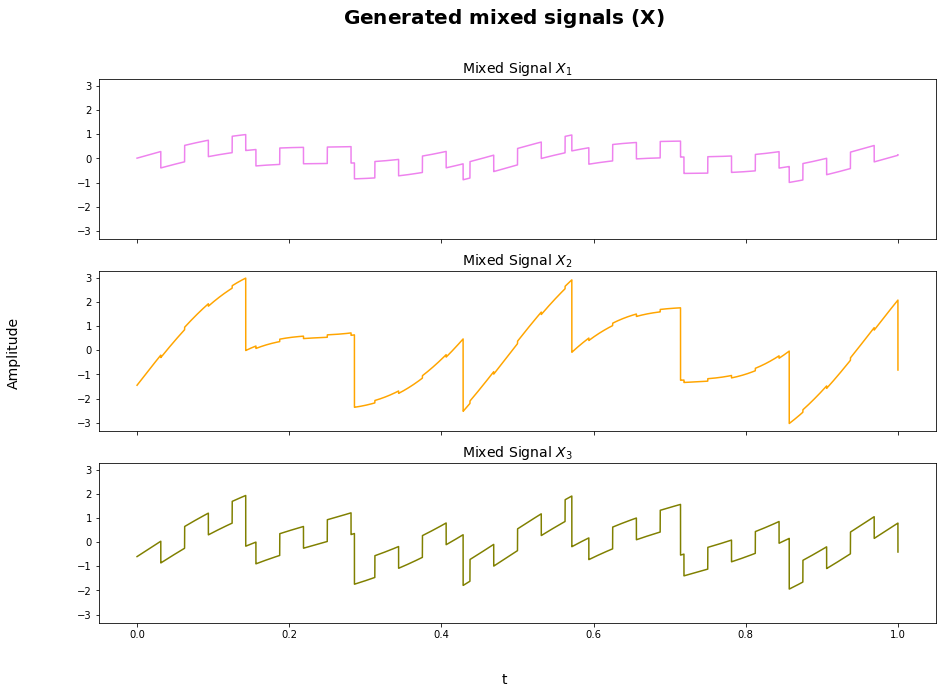

In [34]:
# Visualization of source and mixing data  -------------------------------------------------------------
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10)) #
# Y1
ax[0].set_title('Mixed Signal $X_1$', fontsize=14)
ax[0].plot(t, X.X1, label="Mixture X1", color = 'violet')  #

# Y2
ax[1].set_title('Mixed Signal $X_2$', fontsize=14)
ax[1].plot(t, X.X2, label="Mixture X2", color = 'orange') #

# Y3
ax[2].set_title('Mixed Signal $X_3$', fontsize=14)
ax[2].plot(t, X.X3, label="Mixture X3", color = 'olive') #

fig.text(0.5, 0.04, 't', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=14)
plt.suptitle("Generated mixed signals ($\mathbf{X}$)", fontsize=20, fontweight ='bold')
plt.show()

# 2. Derive Data: Uncorrelated Signals $\hat{\mathbf{Y}}$ (3-D) from Mahalanobis transformation of $\mathbf{X}$

To show that "Uncorrelatedness does not imply independence," here we'd like first to extract the uncorrelated signals (defined as $\hat{\mathbf{Y}}$ such that $Corr(\hat{\mathbf{Y}})= \mathbf{I}$) by the Mahalanobis transformation of $\mathbf{X}$, and then show the uncorrelated signals $\hat{\mathbf{Y}}$ are definitely different from true source (& independent) signals $\mathbf{Y}$

**Note**: 
1. *Mahalanobis transformation of $\mathbf{X}$ is definded as:*
> $\mathbf{\hat{Y}} = \hat{\mathbf{\Sigma}}_\mathbf{X}^{-\frac{1}{2}} \mathbf{X} \\$
 where $\hat{\mathbf{\Sigma}}_\mathbf{X} \equiv
\hat{\operatorname{Cov}(\mathbf{X}) }$

1. Remember that true independent signals $\mathbf{Y}$ can be derived by
> $\mathbf{Y}=\mathbf{W}\mathbf{X}$

1. From above, we show that $\hat{\mathbf{Y}} \neq  \mathbf{Y}$ apparently, since
> $\hat{\mathbf{\Sigma}}_\mathbf{x}^{-\frac{1}{2}} \neq \mathbf{W}$

In [35]:
# ======================================= 2. Derive Data: Uncorrelated Signals Y_hat (3-D) from Mahalanobis transformation =========================================================
#2.1 Derive inverse-square-root of Cov(X) ----------------------------------------------
Cov_X = X.cov()
## Singular value decomposition (Sample)
U, s, Vt = np.linalg.svd(Cov_X) # where Cov_X = np.dot(U * s, Vt)
## define inverse of square-root of S_normal
Cov_X_insqr = np.dot(U * (s**(-0.5)), Vt)

Notice that the inverse of square-root of $Cov(\mathbf{X})$ (i.e., $\hat{\mathbf{\Sigma}}_\mathbf{x}^{-\frac{1}{2}}$)  is 

In [36]:
print('{} *10^2'.format( np.round(Cov_X_insqr/100,2) ))

[[ 0.05 -0.   -0.02]
 [-0.    0.01 -0.01]
 [-0.02 -0.01  0.03]] *10^2


, which is not equal to $\mathbf{W} =$

In [37]:
print('{} *10^2'.format( np.round(W/100,2) ))

[[-0.02 -0.    0.02]
 [ 0.02  0.01 -0.02]
 [ 0.03 -0.01  0.  ]] *10^2


- ## Visualization of Uncorrelated Signals $\hat{\mathbf{Y}}$ (i.e., $\hat{Y_1} \sim \hat{Y_3}$)

In [38]:
#2.2 Derive Y_hat from Mahalanobis transformation ----------------------------------------------
Y_hat = np.dot(Cov_X_insqr, X.T).T
Y_hat = pd.DataFrame(Y_hat, columns=['Y1_m', 'Y2_m', 'Y3_m'])

print('A glance of Y_hat: \n')
Y_hat.head(10)

A glance of Y_hat: 



,Y1_m,Y2_m,Y3_m
0,1.463438,-1.058586,-0.844829
1,1.463417,-1.057253,-0.844119
2,1.463397,-1.055919,-0.843409
3,1.463377,-1.054585,-0.842699
4,1.463357,-1.053252,-0.841989
5,1.463336,-1.051918,-0.841279
6,1.463316,-1.050585,-0.840569
7,1.463296,-1.049251,-0.839859
8,1.463276,-1.047918,-0.839149
9,1.463256,-1.046584,-0.838440


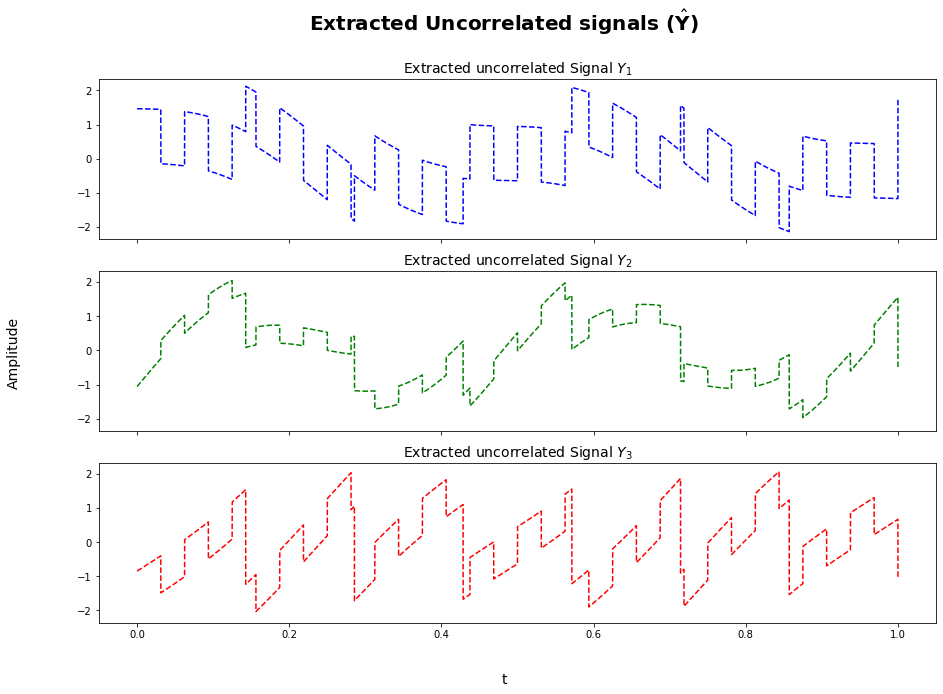

In [39]:
# Visualization of source and mixing data  -------------------------------------------------------------
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10)) #
# Y1
ax[0].set_title('Extracted uncorrelated Signal $Y_1$', fontsize=14)
ax[0].plot(t, Y_hat.Y1_m, label="uncorrelated Y1", color = 'b', linestyle='--')  

# Y2
ax[1].set_title('Extracted uncorrelated Signal $Y_2$', fontsize=14)
ax[1].plot(t, Y_hat.Y2_m, label="uncorrelated Y2", color = 'g', linestyle='--') 

# Y3
ax[2].set_title('Extracted uncorrelated Signal $Y_3$', fontsize=14)
ax[2].plot(t, Y_hat.Y3_m, label="uncorrelated Y3", color = 'r', linestyle='--') 

fig.text(0.5, 0.04, 't', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=14)
plt.suptitle("Extracted Uncorrelated signals ($\hat{\mathbf{Y}}$)", fontsize=20, fontweight ='bold')
plt.show()

- ## Check correlations among $\hat{Y_1} \sim \hat{Y_3}$

According to Mahalanobis transformation, we can demonstrate that $\hat{Y_1} \sim \hat{Y_3}$ are mutually uncorrelated (shown below, where correlation matirx equals identity matrix).

However, it doesn't mean that these signals are independent! 
(This can be checked by evaluation of cumulants which are investigated in the next section)

In [40]:
## Check correlation of Y_hat
print( 'Corr matrix of Y_hat is\n' )
np.round(Y_hat.corr(), 4) 

Corr matrix of Y_hat is



,Y1_m,Y2_m,Y3_m
Y1_m,1.0,-0.0,0.0
Y2_m,-0.0,1.0,0.0
Y3_m,0.0,0.0,1.0


# 3. Check independence of signals ($\mathbf{Y}$ vs $\hat{\mathbf{Y}}$) through evaluation of cumulants

If signals are mutually independent, them all order of their cumulants should be approximated 0.

As a results, if we can find counterexamples for $\hat{\mathbf{Y}}$ such that there exist non-zero cumulants, we then prove that $\hat{\mathbf{Y}}$ are NOT independent.

Eventually, the following results prove our speculation:

- ### Estimation of Cumulant $\mbox{ E}\{Y_1 * Y_3^2\}$ (both for independent and uncorrelated signals)

In [41]:
## 3.1. Compare Y vs Y_hat through estimating cumulant E{Y1 * Y3^2} V
C_Y = np.mean(Y.Y1 * Y.Y3**2); 
C_Y_hat = np.mean(Y_hat.Y1_m * Y_hat.Y3_m**2)
#print('Estimated cumulant E{{Y1^3 * Y2}} \n from Mahalanobis is {}, \n while from ICA is {}'.format( np.round(C_Y_hat, 4), np.round(C_Y, 4) ))

pd.DataFrame(np.array([[C_Y_hat, C_Y]]), columns=['Y_hat', 'Y'], index=['Cumulant'])

,Y_hat,Y
Cumulant,-0.010423,-0.0004


- ### Estimation of Cumulant $\mbox{ E}\{Y_2^2 * Y_3\}$ (both for independent and uncorrelated signals)

In [42]:
## 3.2. Compare Y vs Y_hat through estimating cumulant E{Y2^2 * Y3} V
C_Y = np.mean(Y.Y2**2 * Y.Y3); 
C_Y_hat = np.mean(Y_hat.Y2_m**2 * Y_hat.Y3_m)
#print('Estimated cumulant E{{Y2^2 * Y3}}\n from Mahalanobis is {}, \n while from ICA is {}'.format( np.round(C_Y_hat, 4), np.round(C_Y, 4) ))

pd.DataFrame(np.array([[C_Y_hat, C_Y]]), columns=['Y_hat', 'Y'], index=['Cumulant'])

,Y_hat,Y
Cumulant,-0.001928,-0.002907


- ### Estimation of Cumulant $\mbox{ E}\{Y_1^3 * Y_2\}$ (both for independent and uncorrelated signals)

In [43]:
## 3.3. Compare Y vs Y_hat through estimating cumulant E{Y1^3 * Y2} V
C_Y = np.mean(Y.Y1**3 * Y.Y2); 
C_Y_hat = np.mean(Y_hat.Y1_m**3 * Y_hat.Y2_m)
#print('Estimated cumulant E{{Y1^3 * Y2}} \n from Mahalanobis is {}, \n while from ICA is {}'.format( np.round(C_Y_hat, 4), np.round(C_Y, 4) ))

pd.DataFrame(np.array([[C_Y_hat, C_Y]]), columns=['Y_hat', 'Y'], index=['Cumulant'])

,Y_hat,Y
Cumulant,0.189334,0.006246


- ### Estimation of Cumulant $\mbox{ E}\{Y_1^2 * Y_2 * Y_3\}$ (both for independent and uncorrelated signals)

In [44]:
## 3.4. Compare Y vs Y_hat through estimating  E{Y1^2 * Y2 * Y3} V
C_Y = np.mean(Y.Y1**2 * Y.Y2 * Y.Y3); 
C_Y_hat = np.mean(Y_hat.Y1_m**2 * Y_hat.Y2_m * Y_hat.Y3_m)
#print('Estimated cumulant E{{Y1^2 * Y2 * Y3}} \n from Mahalanobis is {}, \n while from ICA is {}'.format( np.round(C_Y_hat, 4), np.round(C_Y, 4) ))

pd.DataFrame(np.array([[C_Y_hat, C_Y]]), columns=['Y_hat', 'Y'], index=['Cumulant'])

,Y_hat,Y
Cumulant,0.171942,0.025251


# 4. Derive True Independent Signals $\mathbf{Y}_{ICA}$ (3-D) from ICA

The previous section demonstrates that Mahalanobis transformation fails to extract true **independent signals**, in this section, we'd like to demonstrate that:
1. ICA can succeed in doing so (i.e., Transform $\mathbf{X}$ with ICA to derive $\hat{\mathbf{Y}}_{ICA}$ s.t. $\mathbf{Y}_{ICA} = \mathbf{Y}$)
1. We also compare it with the results of derived signals from other techniques, that is, **Principle Component Analysis (PCA)** and **Factor Analysis (FA)**

- ## Review: Visual Comparison of True Independent Signals $\mathbf{Y}$ with Mixed Signals $\mathbf{X}$

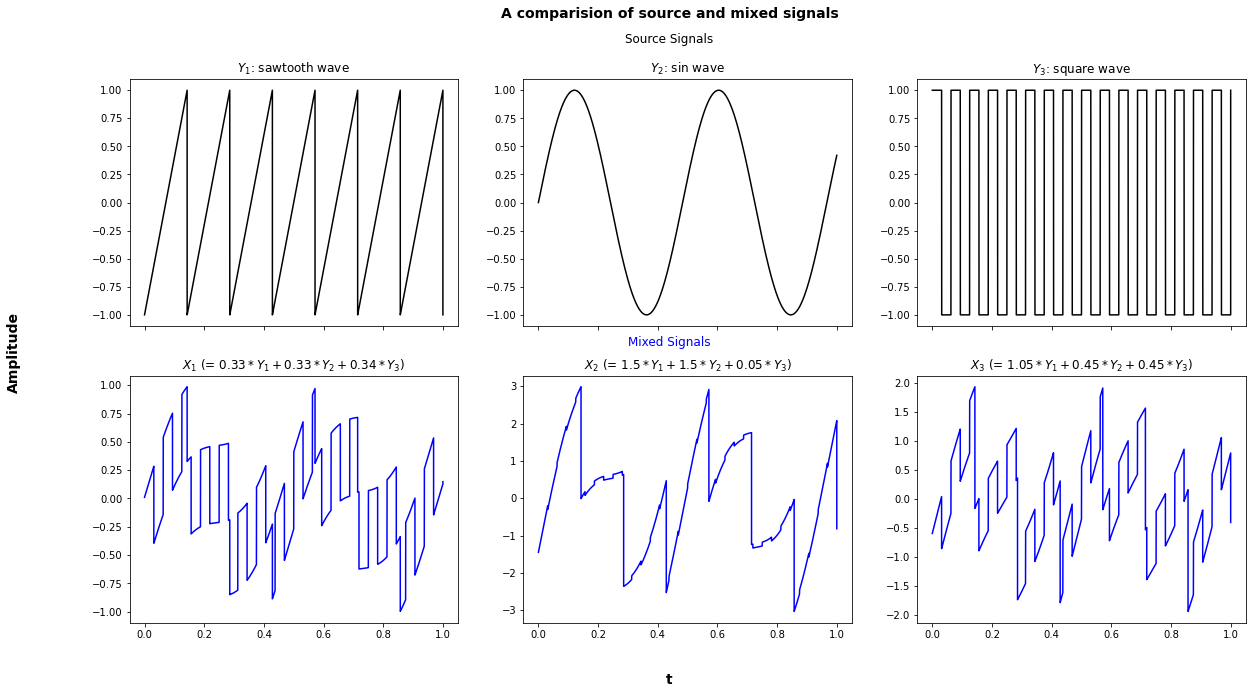

In [45]:
# Visualization of source and mixing data  --------------------------------------------------------------

fig, ax = plt.subplots(2, 3, sharex=True, figsize=(20,10)) #, sharey=True
# True source signal Y
ax[0,0].set_title('$Y_1$: sawtooth wave')
ax[0,0].plot(t, Y.Y1, label="Source Y1", color = 'k')
ax[0,1].set_title('$Y_2$: sin wave')
ax[0,1].plot(t, Y.Y2, label="Source Y2", color = 'k')
ax[0,2].set_title('$Y_3$: square wave')
ax[0,2].plot(t, Y.Y3, label="Source Y3", color = 'k')
fig.text(0.5, 0.93, 'Source Signals', ha='center', color='k', fontsize=12)

# Mixed signals X
ax[1,0].set_title(f'$X_1$ (= ${np.round(A[0,0],4)}*Y_1 + {np.round(A[0,1],4)}*Y_2 + {np.round(A[0,2],4)}*Y_3$)')
ax[1,0].plot(t, X.X1, label="Mixed X1", color = 'b')
ax[1,1].set_title(f'$X_2$ (= ${np.round(A[1,0],4)}*Y_1 + {np.round(A[1,1],4)}*Y_2 + {np.round(A[1,2],4)}*Y_3$)')
ax[1,1].plot(t, X.X2, label="Mixed X2", color = 'b')
ax[1,2].set_title(f'$X_3$ (= ${np.round(A[2,0],4)}*Y_1 + {np.round(A[2,1],4)}*Y_2 + {np.round(A[2,2],4)}*Y_3$)')
ax[1,2].plot(t, X.X3, label="Mixed X3", color = 'b')
fig.text(0.5, 0.51, 'Mixed Signals', ha='center', color='b', fontsize=12)


fig.text(0.5, 0.04, 't', ha='center', fontsize=14, fontweight ='bold')
fig.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=14, fontweight ='bold')

plt.suptitle("A comparision of source and mixed signals", fontsize=14, fontweight ='bold')

plt.savefig("./Plots/Compare source and mixing data (artificial).png", transparent=True)
plt.show()

## 4.1. ICA Results (i.e., $\mathbf{Y}_{ICA}$)

In [46]:
## -------------------------------------- 1.1 ICA Analysis --------------------------------------------------------------
### Preprocessing Data --------------------------------------------------------------
# Centering the mixed signals
X_m = X - X.mean()

# Recaling of variance (i.e., standardization) of X1, X2 is not performed here since in later analysis,
# "whitening" would be operated instead

### ICA --------------------------------------------------------------
from sklearn.decomposition import FastICA

transformer = FastICA(n_components=3, random_state=0, whiten='unit-variance')
Y_pred = transformer.fit_transform(X_m)
Y_pred.shape


(20000, 3)

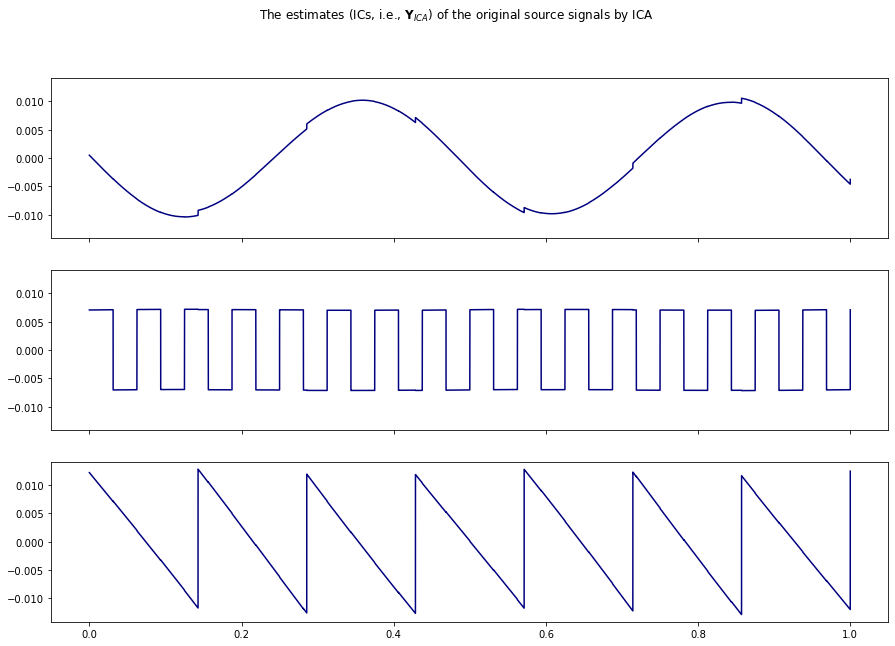

In [47]:
ig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10))
# Plot seperated signals
ax[0].plot(t, Y_pred[:,0], label="IC Y1", color = 'navy')
ax[1].plot(t, Y_pred[:,1], label="IC Y2", color = 'navy')
ax[2].plot(t, Y_pred[:,2], label="IC Y3", color = 'navy')

plt.suptitle("The estimates (ICs, i.e., $\mathbf{Y}_{ICA}$) of the original source signals by ICA")
plt.show()
#plt.savefig("ICA estimates of source data.png", transparency=True)

## 4.2. PCA Results (i.e., $\mathbf{Y}_{PCA}$)

In [48]:
## -------------------------------------- 1.2 PCA Analysis --------------------------------------------------------------
### Preprocessing Data --------------------------------------------------------------
# Standardize the mixed signals (i.e., mean=0, std=1)
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
matrix = sc_X.fit_transform(X)
'''#check
matrix.mean(axis=0) 
matrix.std(axis=0) 
'''

### PCA --------------------------------------------------------------
from sklearn.decomposition import PCA
pca = PCA(n_components=3) #n_components=None or integer
Y_pred_PCA = pca.fit_transform(matrix)
#PCs = pca.components_ #each row is a PC -> PC1 = pca.components_[0,:]

#Rescale Y_pred_PCA to the original scale as that of matrix (X)
Y_pred_PCA_rs = sc_X.inverse_transform(Y_pred_PCA)


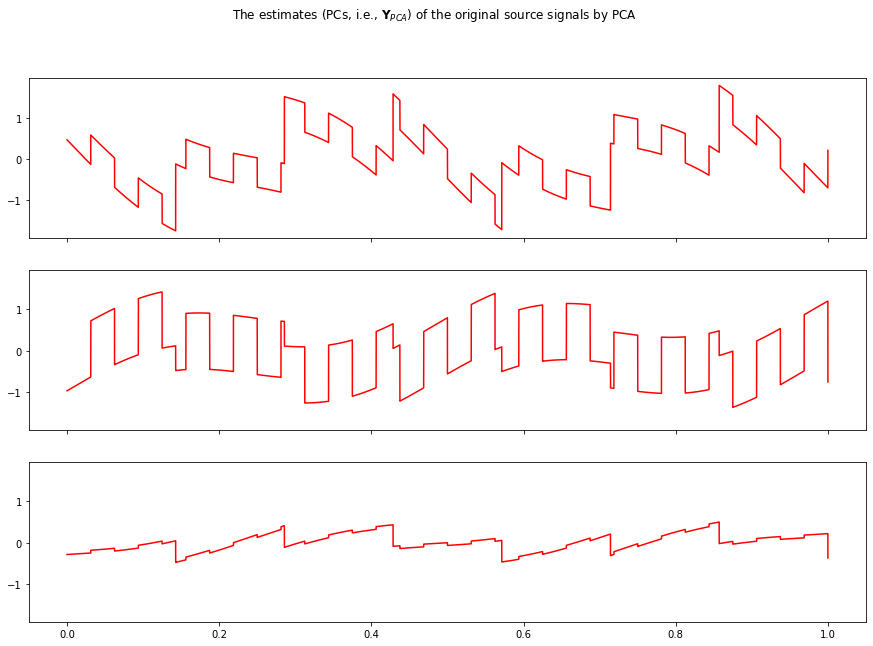

In [53]:
### Visualization --------------------------------------------------------------
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10))
# Plot seperated signals
ax[0].plot(t, Y_pred_PCA_rs[:,0], label="PC Y1", color = 'r')
ax[1].plot(t, Y_pred_PCA_rs[:,1], label="PC Y2", color = 'r')
ax[2].plot(t, Y_pred_PCA_rs[:,2], label="PC Y3", color = 'r')
plt.suptitle("The estimates (PCs, i.e., $\mathbf{Y}_{PCA}$) of the original source signals by PCA")
plt.show()
#plt.savefig("PCA estimates of source data.png", transparency=True)

## 4.3. FA Results (i.e., $\mathbf{Y}_{FA}$)

In [50]:
## -------------------------------------- 1.3. FA Analysis --------------------------------------------------------------
### Preprocessing Data --------------------------------------------------------------

from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components=3, rotation='varimax', random_state=0)
Y_pred_FA = FA.fit_transform(X)
FA.get_params()
Y_pred_FA.shape


(20000, 3)

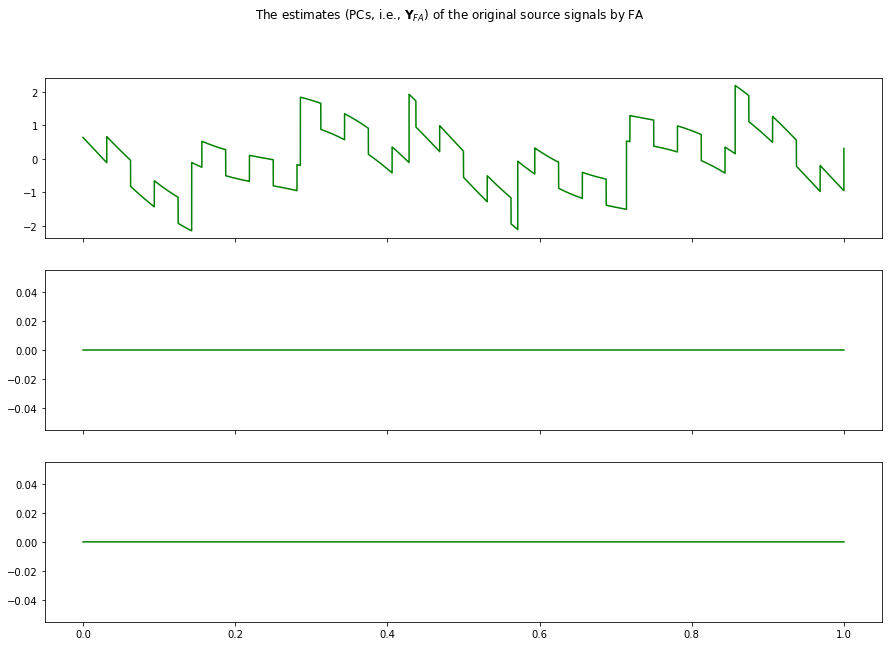

In [51]:
### Visualization --------------------------------------------------------------
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(15,10))#, sharey=True
# Plot seperated signals
ax[0].plot(t, Y_pred_FA[:,0], label="Factor Y1", color = 'green')
ax[1].plot(t, Y_pred_FA[:,1], label="Factor Y2", color = 'green')
ax[2].plot(t, Y_pred_FA[:,2], label="Factor Y3", color = 'green')

plt.suptitle("The estimates (PCs, i.e., $\mathbf{Y}_{FA}$) of the original source signals by FA")
plt.show()
#plt.savefig("FA estimates of source data.png", transparency=True)

- ## Summary

From the results of ICA, PCA as well as FA, we can see that:
1. PCA and FA both fail at separating **independent** signals; just as Mahalanobis transformation demonstrated above, these two techniques basically can only extract **uncorrelated** signals, which is why they fail at extraction while true signals are mutually actually independent.
1. ICA, however, can quite precisely approximate **independent** signals, as required (though bound with minor errors, which may due to sample size, or the design of waveform).
> * __Note__: you may notice that directions (i.e., amplitude) of some of the extracted signals ($\mathbf{Y}_{ICA}$) are opposite of the original ones ($\mathbf{Y}$) , this is because of the property of **sign ambiguity** of ICA, which won’t affect the model results (in other words, multiplying IC by -1 won’t affect the results) *

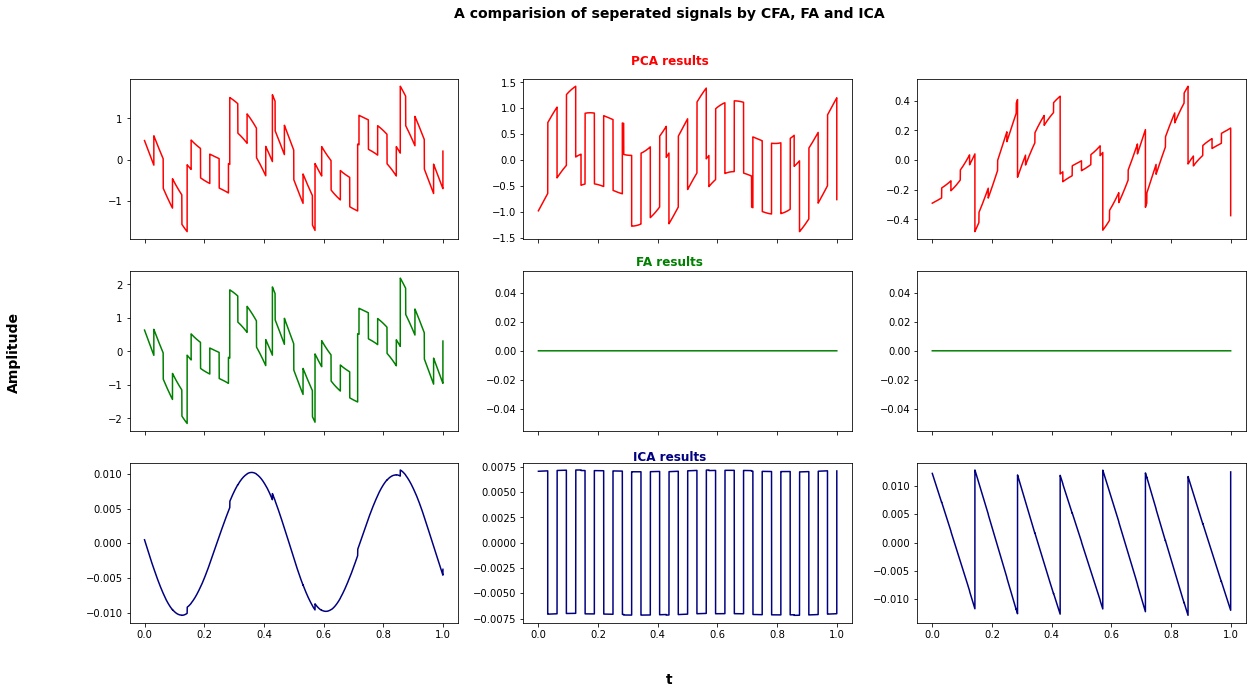

In [56]:
# ======================================= 2. Summary & Visualization of Results =========================================================

### Visualization of Results from PCA/FA/ICA --------------------------------------------------------------
fig, ax = plt.subplots(3, 3, sharex=True,  figsize=(20,10)) #sharey=True,
# Plot seperated signals: PCA
ax[0,0].plot(t, Y_pred_PCA_rs[:,0], label="PC Y1", color = 'r')
ax[0,1].plot(t, Y_pred_PCA_rs[:,1], label="PC Y2", color = 'r')
ax[0,2].plot(t, Y_pred_PCA_rs[:,2], label="PC Y3", color = 'r')
fig.text(0.5, 0.90, 'PCA results', ha='center', color='r', fontsize=12, fontweight ='bold')

# Plot seperated signals: FA
ax[1,0].plot(t, Y_pred_FA[:,0], label="Factor Y1", color = 'green')
ax[1,1].plot(t, Y_pred_FA[:,1], label="Factor Y2", color = 'green')
ax[1,2].plot(t, Y_pred_FA[:,2], label="Factor Y3", color = 'green')
fig.text(0.5, 0.62, 'FA results', ha='center', color='green', fontsize=12, fontweight ='bold')

# Plot seperated signals: ICA
ax[2,0].plot(t, Y_pred[:,0], label="IC Y1", color = 'navy')
ax[2,1].plot(t, Y_pred[:,1], label="IC Y2", color = 'navy')
ax[2,2].plot(t, Y_pred[:,2], label="IC Y3", color = 'navy')
fig.text(0.5, 0.35, 'ICA results', ha='center', color='navy', fontsize=12, fontweight ='bold')

fig.text(0.5, 0.04, 't', ha='center', fontsize=14, fontweight ='bold')
fig.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=14, fontweight ='bold')


plt.suptitle("A comparision of seperated signals by CFA, FA and ICA", fontsize=14, fontweight ='bold')
plt.savefig("./Plots/Compare estimates of source data from PCA-FA-ICA (artificial).png", transparent=True)
plt.show()


